In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [38]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [40]:
clf = DecisionTreeClassifier(max_depth = 2,
                             random_state = 0)

In [41]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [150]:
prediction = clf.predict(X_test)

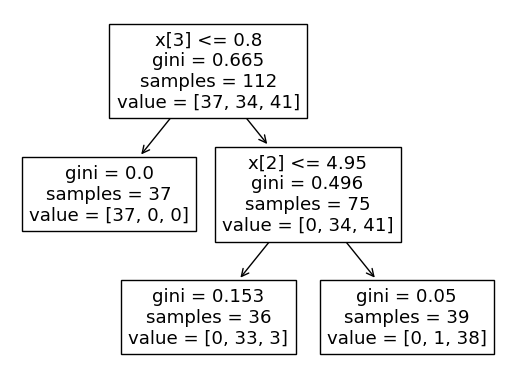

In [43]:
tree.plot_tree(clf);

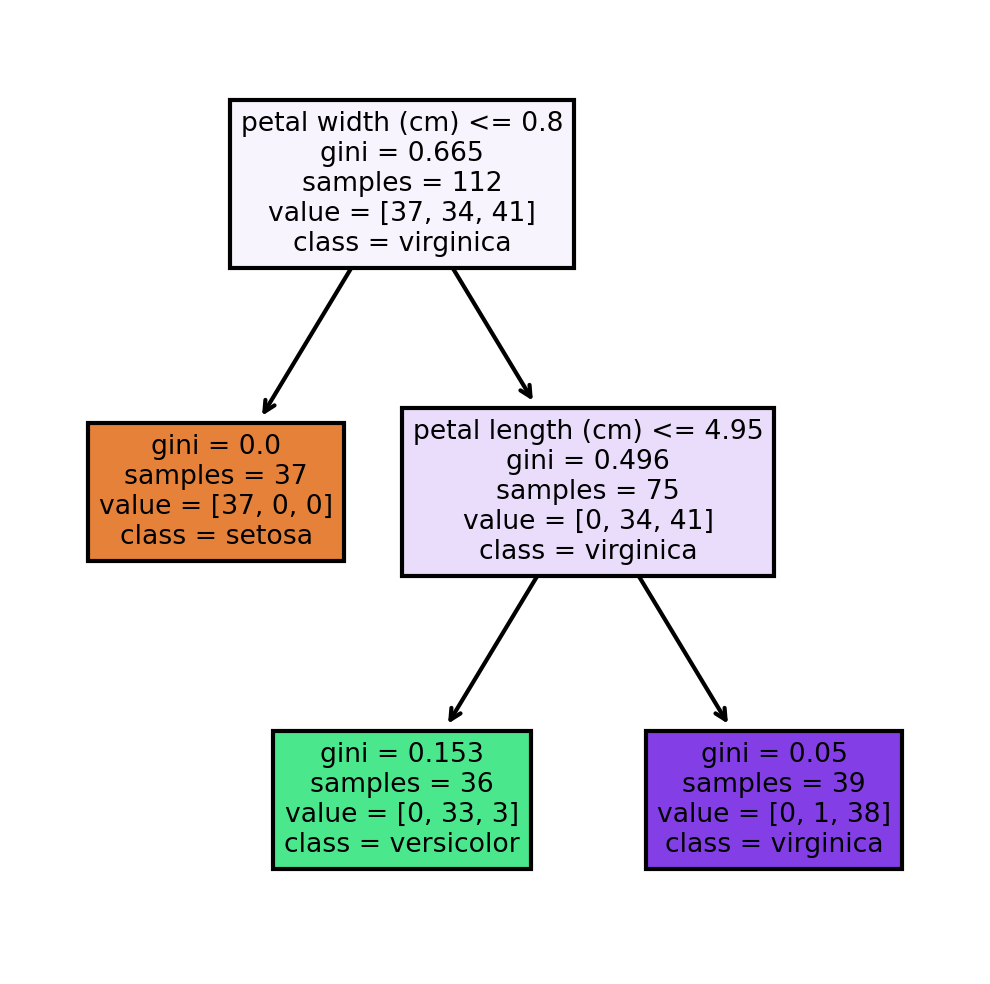

In [33]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [11]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn,
                     class_names=cn,
                     filled = True)

In [13]:
!dot -Tsvg tree.dot -o tree.svg

In [47]:
import dtreeviz
viz = dtreeviz.model(clf,
               X_train,
               Y_train,
               target_name='target',
               feature_names=fn,
               class_names=cn)

/Users/Patrice/anaconda3/envs/CoursDataMining/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


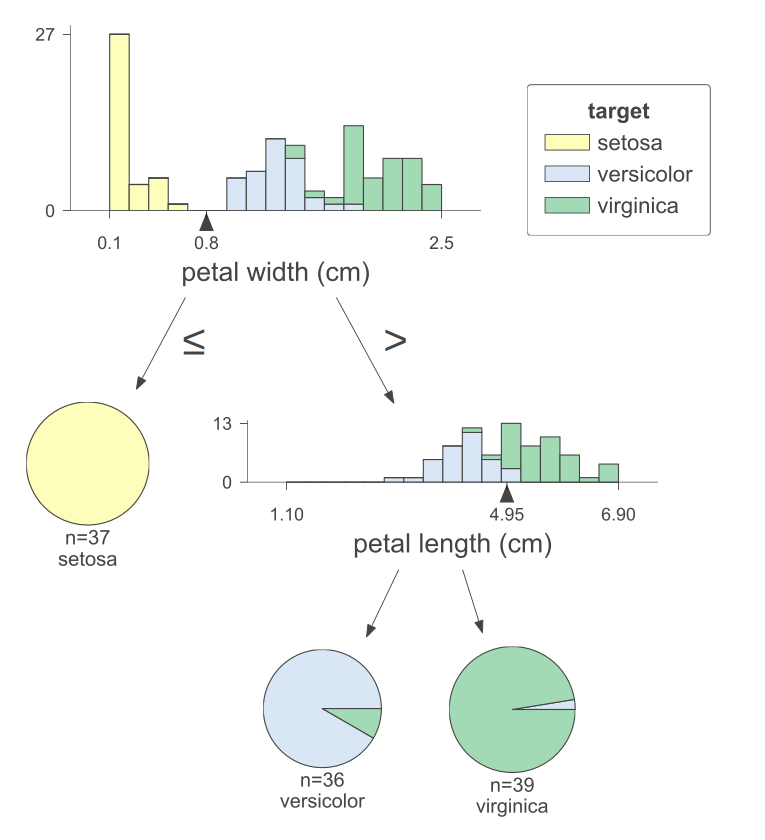

In [48]:
viz.view(scale=3)

### Données Titanic

In [50]:
import os
os.getcwd()

'/Users/Patrice/DataspellProjects/Cours Analyse données'

In [4]:
titanic = pd.read_csv("~/DataspellProjects/TPPandas/Datasets/titanic.csv")

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})
titanic['Embarked']=titanic['Embarked'].map({'S':0,'C':1,'Q':2})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [7]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [8]:
titanic.dropna(subset=features,how="any",inplace=True)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

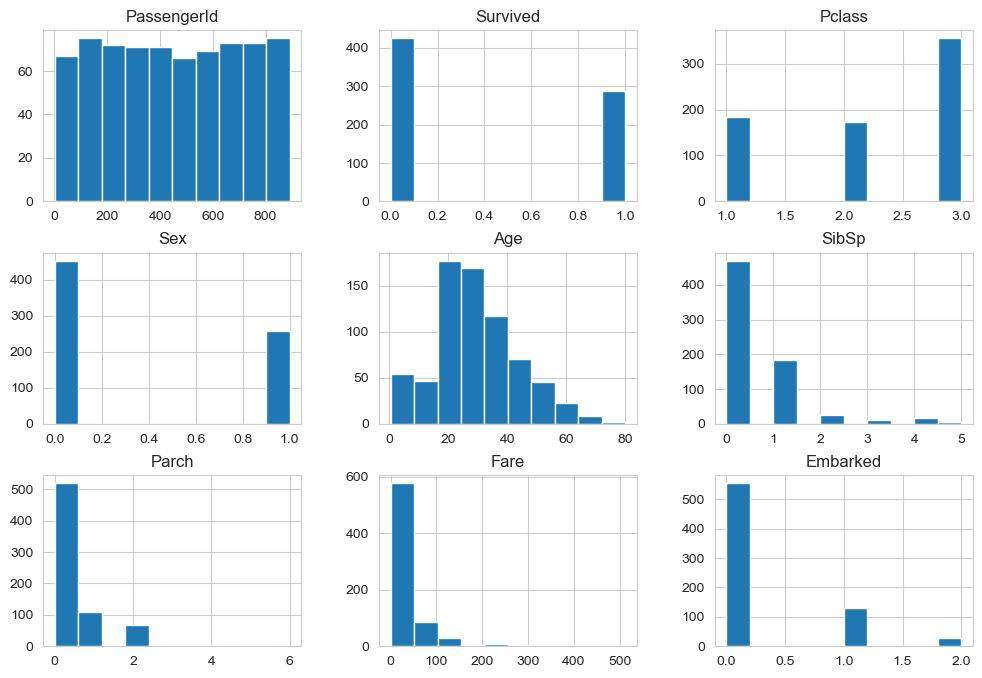

In [42]:
titanic.hist(figsize=(12,8))

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 72.3+ KB


In [41]:
titanic.groupby(['Survived','Pclass']).size()

Survived  Pclass
0         1          64
          2          90
          3         270
1         1         120
          2          83
          3          85
dtype: int64

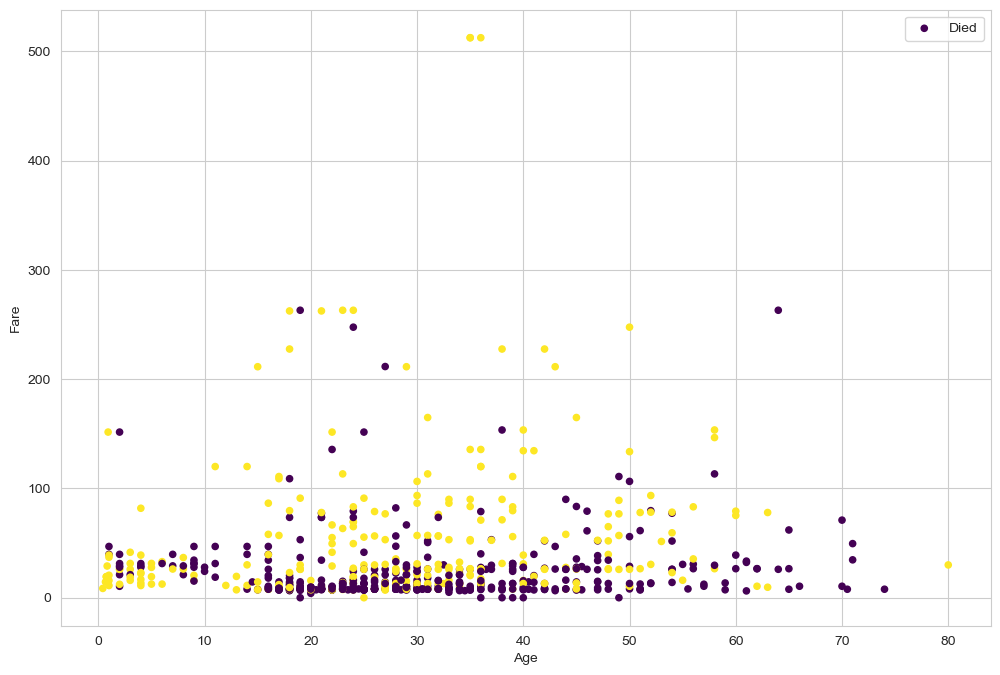

In [44]:
titanic.plot(kind='scatter',x='Age',y='Fare',c='Survived',colormap='viridis',colorbar=False,figsize=(12,8))
plt.legend(['Died','Survived'])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic[features], titanic['Survived'], random_state=0)

In [9]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
138,3,0,16.0,0,0,9.2167,0.0
619,2,0,26.0,0,0,10.5000,0.0
130,3,0,33.0,0,0,7.8958,1.0
621,1,0,42.0,1,0,52.5542,0.0
676,3,0,24.5,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2.0
239,2,0,33.0,0,0,12.2750,0.0
791,2,0,16.0,0,0,26.0000,0.0
705,2,0,39.0,0,0,26.0000,0.0


In [11]:
Y_train

138    0
619    0
130    0
621    1
676    0
      ..
885    0
239    0
791    0
705    0
858    1
Name: Survived, Length: 534, dtype: int64

In [46]:
print(Y_train.value_counts())

0    320
1    214
Name: Survived, dtype: int64


In [10]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
423,3,1,28.00,1,1,14.4000,0.0
178,2,0,30.00,0,0,13.0000,0.0
305,1,0,0.92,1,2,151.5500,0.0
292,2,0,36.00,0,0,12.8750,1.0
592,3,0,47.00,0,0,7.2500,0.0
...,...,...,...,...,...,...,...
267,3,0,25.00,1,0,7.7750,0.0
503,3,1,37.00,0,0,9.5875,0.0
100,3,1,28.00,0,0,7.8958,0.0
268,1,1,58.00,0,1,153.4625,0.0


In [12]:
Y_test

423    0
178    0
305    1
292    0
592    0
      ..
267    1
503    0
100    0
268    1
624    0
Name: Survived, Length: 178, dtype: int64

In [47]:
print(Y_test.value_counts())

0    104
1     74
Name: Survived, dtype: int64


In [38]:
clf = DecisionTreeClassifier(max_depth = 4,
                             random_state = 0)

In [39]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [12]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0])

In [13]:
clf.score(X_test,Y_test)

0.8033707865168539

In [17]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test,clf.predict(X_test))
confusion_df = pd.DataFrame(confusion_matrix, index=['Died','Survived'], columns=['Died','Survived'])

In [104]:
print(confusion_matrix)

[[91 13]
 [22 52]]


In [105]:
confusion_df

,Died,Survived
Died,91,13
Survived,22,52


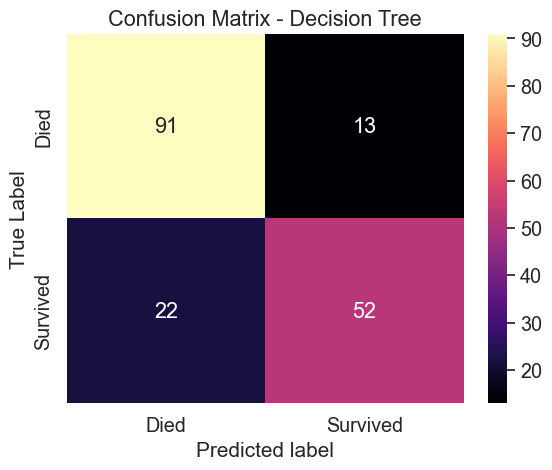

<Figure size 1000x700 with 0 Axes>

In [109]:
import seaborn as sns
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(confusion_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

In [19]:
print(metrics.classification_report(Y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.80      0.70      0.75        74

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [31]:
clf.feature_importances_

array([0.21809606, 0.52927204, 0.10382112, 0.07473026, 0.00615502,
       0.06792549, 0.        ])

In [30]:
importances_sk = clf.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
feature_importance_sk = sorted(feature_importance_sk.items(), key=lambda x: x[1], reverse=True)
print("Feature importance by sklearn: \n", feature_importance_sk)

Feature importance by sklearn: 
 [('Sex', 0.529), ('Pclass', 0.218), ('Age', 0.104), ('SibSp', 0.075), ('Fare', 0.068), ('Parch', 0.006), ('Embarked', 0.0)]


In [33]:
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

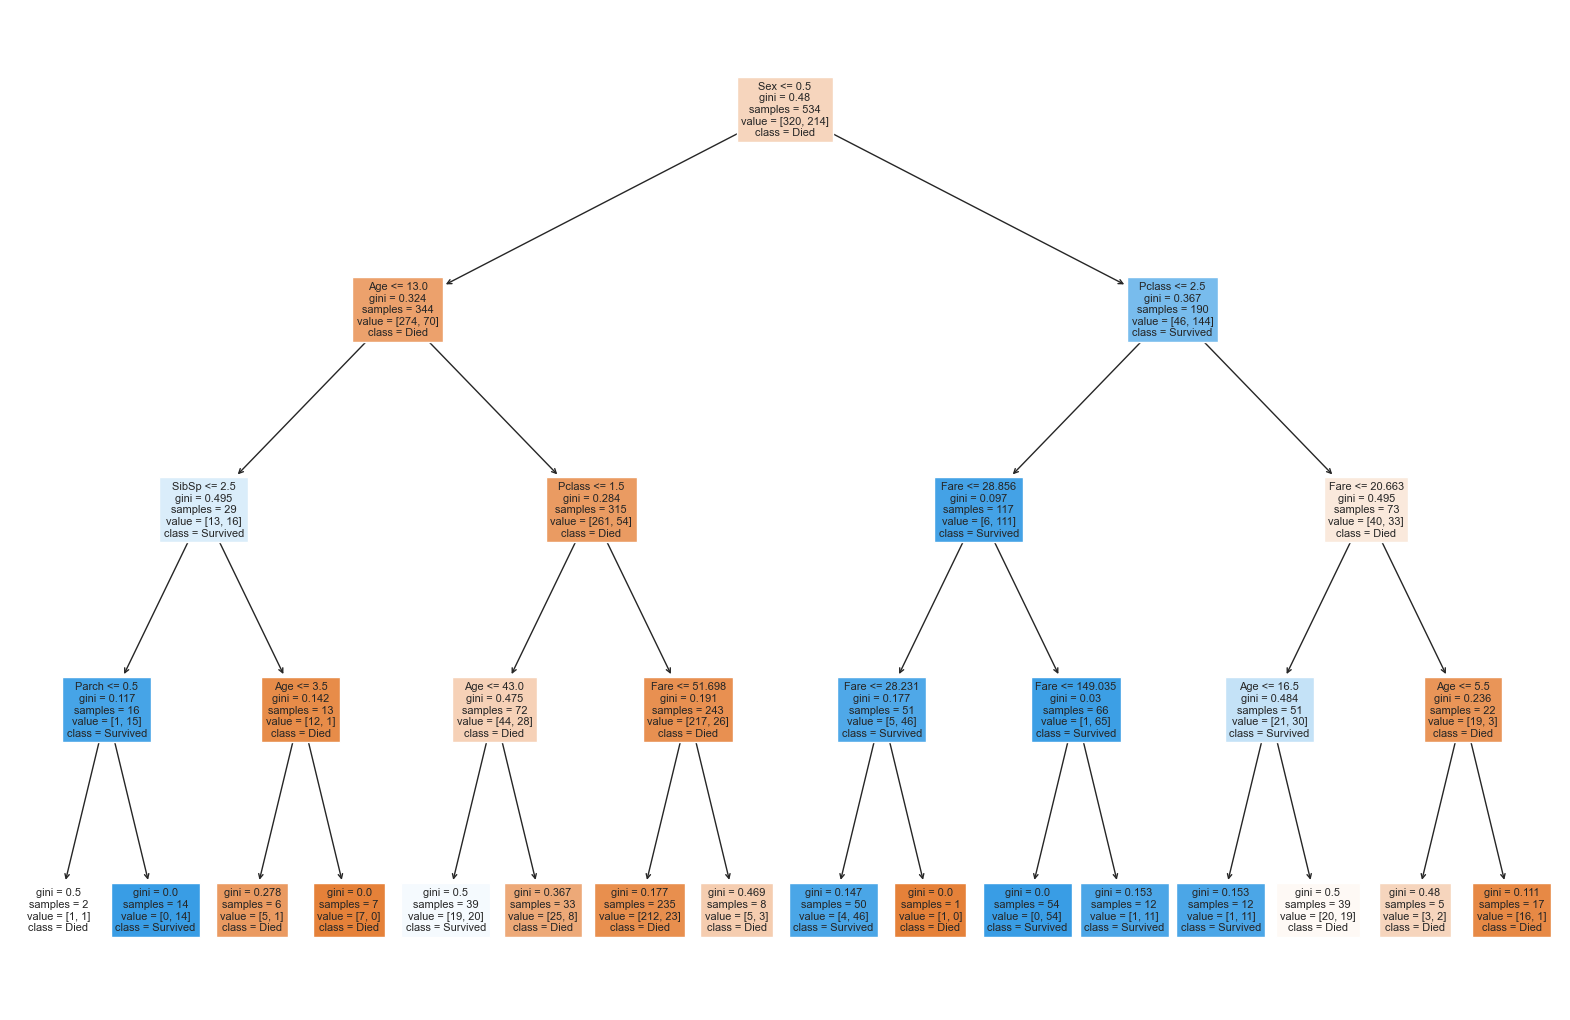

In [20]:
plt.figure(figsize=(20,13))
tree.plot_tree(clf, feature_names = features, class_names=['Died','Survived'], filled = True);

In [131]:
viz = dtreeviz.model(clf,
                     X_train,
                     Y_train,
                     target_name='Survived',
                     feature_names=features,
                     class_names=['Died','Survived']
                     )

/Users/Patrice/anaconda3/envs/CoursDataMining/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


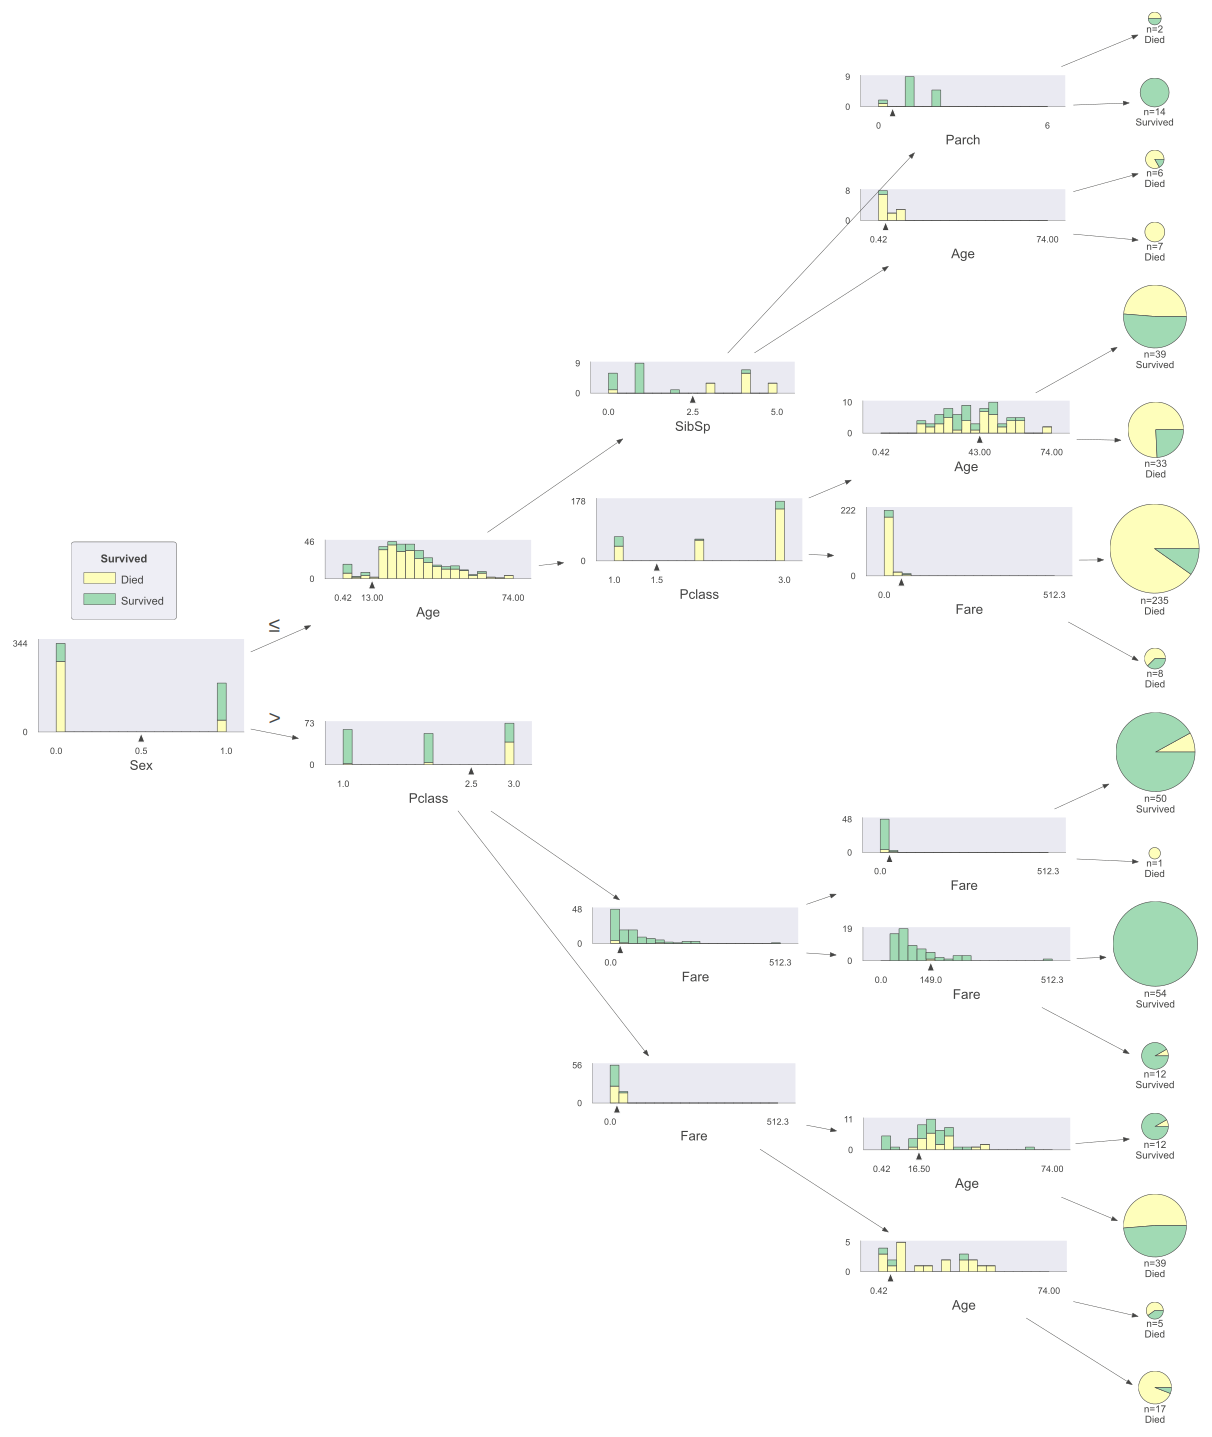

In [132]:
viz.view(orientation="LR",scale=1.5)

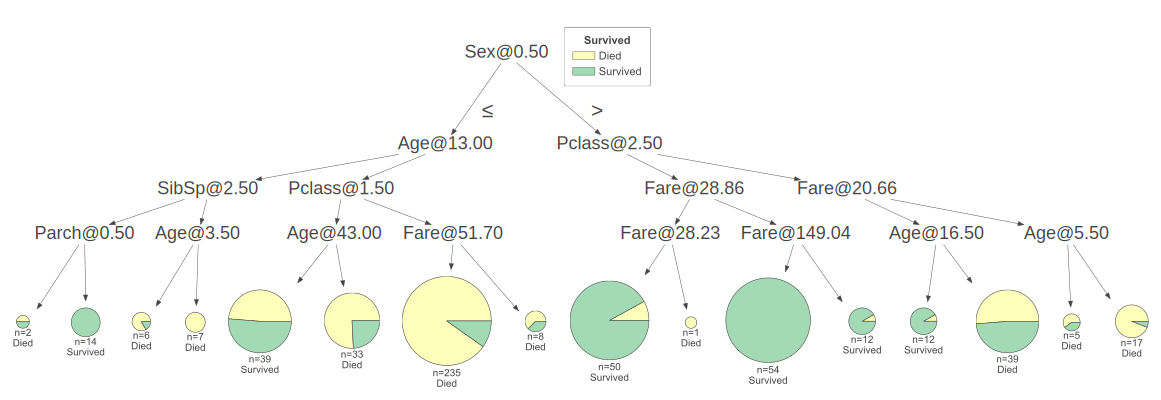

In [96]:
viz.view(fancy=False,orientation="TD",scale=1.5)

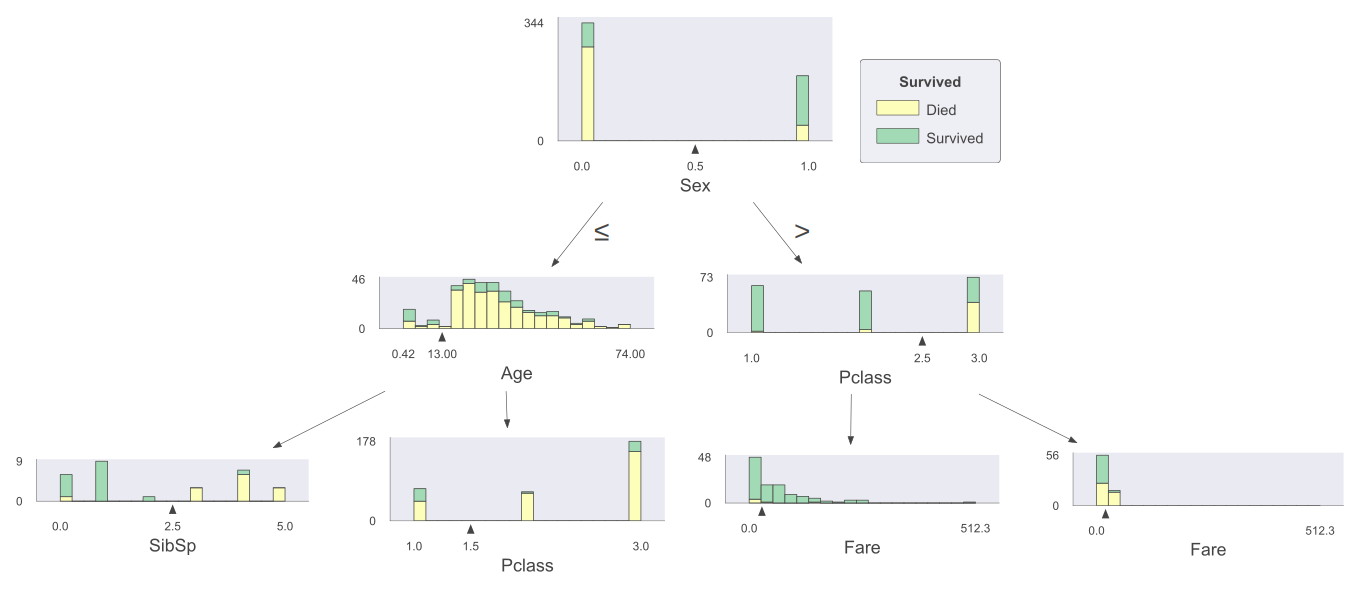

In [125]:
viz.view(depth_range_to_display=(0,2),orientation="TD",scale=2)

In [88]:
v.save("titanic.svg")

In [117]:
Y_test

423    0
178    0
305    1
292    0
592    0
      ..
267    1
503    0
100    0
268    1
624    0
Name: Survived, Length: 178, dtype: int64

In [119]:
x_test_sample = X_test.iloc[0]
print(x_test_sample)
print("Survided ? ",Y_test.iloc[0])

Pclass       3.0
Sex          1.0
Age         28.0
SibSp        1.0
Parch        1.0
Fare        14.4
Embarked     0.0
Name: 423, dtype: float64
Survided ?  0


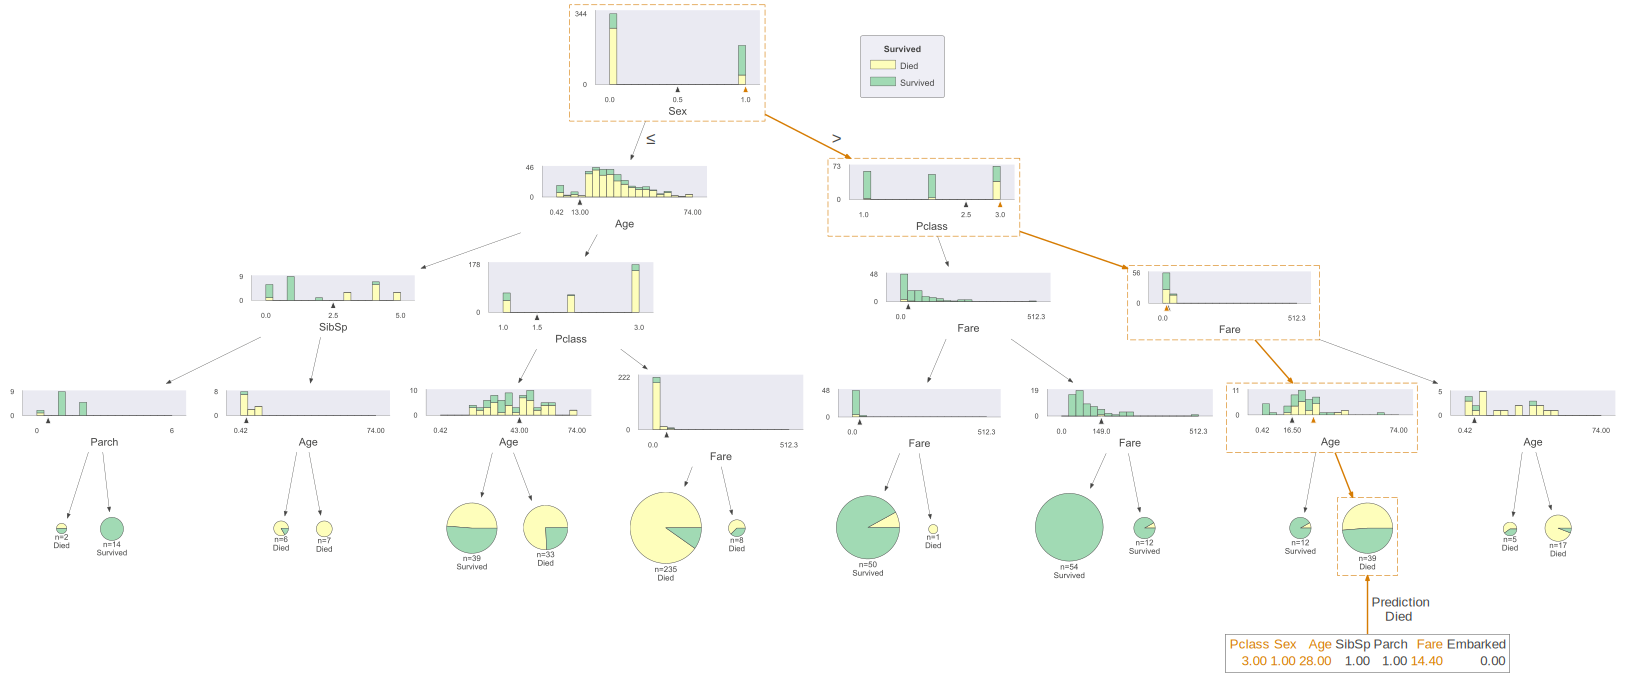

In [142]:
viz.view(x=x_test_sample,scale=1.2)

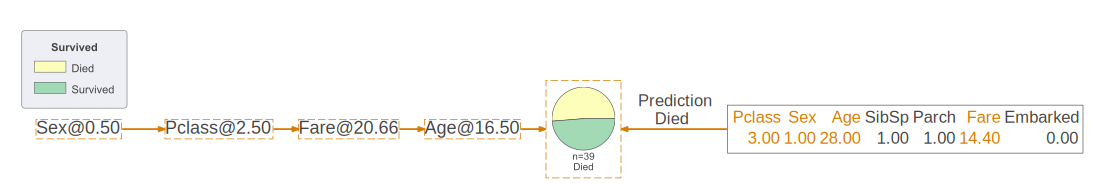

In [148]:
viz.view(x=x_test_sample,scale=1.5,orientation="LR", show_just_path=True, fancy=False)

In [15]:
for _ in range (1,15):
    clf = DecisionTreeClassifier(max_depth = _, random_state = 0)
    clf.fit(X_train, Y_train)
    clf.score(X_test,Y_test)
    print("Score for depth {}: {}".format(_,clf.score(X_test,Y_test)))

Score for depth 1: 0.7696629213483146
Score for depth 2: 0.7865168539325843
Score for depth 3: 0.8033707865168539
Score for depth 4: 0.8033707865168539
Score for depth 5: 0.8033707865168539
Score for depth 6: 0.7808988764044944
Score for depth 7: 0.7921348314606742
Score for depth 8: 0.797752808988764
Score for depth 9: 0.7921348314606742
Score for depth 10: 0.7921348314606742
Score for depth 11: 0.7865168539325843
Score for depth 12: 0.7471910112359551
Score for depth 13: 0.7921348314606742
Score for depth 14: 0.7415730337078652


In [35]:
for i in range (0,20):
    X_train, X_test, Y_train, Y_test = train_test_split(titanic[features], titanic['Survived'], random_state=0)
    clf = DecisionTreeClassifier(max_depth = 6, random_state = i*10)
    clf.fit(X_train, Y_train)
    print("Score for iteration {}: {}".format(i,clf.score(X_test,Y_test)))

Score for iteration 0: 0.7808988764044944
Score for iteration 1: 0.7808988764044944
Score for iteration 2: 0.7808988764044944
Score for iteration 3: 0.7865168539325843
Score for iteration 4: 0.7752808988764045
Score for iteration 5: 0.7865168539325843
Score for iteration 6: 0.7865168539325843
Score for iteration 7: 0.7865168539325843
Score for iteration 8: 0.7808988764044944
Score for iteration 9: 0.7640449438202247
Score for iteration 10: 0.7752808988764045
Score for iteration 11: 0.7752808988764045
Score for iteration 12: 0.7696629213483146
Score for iteration 13: 0.7865168539325843
Score for iteration 14: 0.7865168539325843
Score for iteration 15: 0.7640449438202247
Score for iteration 16: 0.7865168539325843
Score for iteration 17: 0.7865168539325843
Score for iteration 18: 0.7808988764044944
Score for iteration 19: 0.7696629213483146


### Test sur données titanic_test

In [34]:
titanic_test = pd.read_csv("~/DataspellProjects/TPPandas/Datasets/titanic_test.csv")
titanic_test['Sex']=titanic_test['Sex'].map({'male':0,'female':1})
titanic_test['Embarked']=titanic_test['Embarked'].map({'S':0,'C':1,'Q':2})
titanic_test.dropna(subset=features,how="any",inplace=True)

In [40]:
clf.score(titanic_test[features],titanic_test['Survived'])

0.7613293051359517

In [43]:
for _ in range (1,15):
    clf = DecisionTreeClassifier(max_depth = _, random_state = 0)
    clf.fit(X_train, Y_train)
    print("Score for depth {}: {}".format(_,clf.score(titanic_test[features],titanic_test['Survived'])))

Score for depth 1: 1.0
Score for depth 2: 0.8006042296072508
Score for depth 3: 0.9546827794561934
Score for depth 4: 0.7613293051359517
Score for depth 5: 0.7854984894259819
Score for depth 6: 0.8157099697885196
Score for depth 7: 0.7643504531722054
Score for depth 8: 0.8157099697885196
Score for depth 9: 0.8126888217522659
Score for depth 10: 0.8006042296072508
Score for depth 11: 0.7764350453172205
Score for depth 12: 0.7492447129909365
Score for depth 13: 0.7613293051359517
Score for depth 14: 0.743202416918429


In [51]:
print(titanic_test.groupby(['Survived','Sex']).size())

Survived  Sex
0         0      204
1         1      127
dtype: int64


In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=4)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [48]:
rf.score(X_test,Y_test)

0.8033707865168539

In [49]:
rf.score(titanic_test[features],titanic_test['Survived'])

0.8851963746223565

## Random Forest

In [14]:
# Load the Breast Cancer (Diagnostic) Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

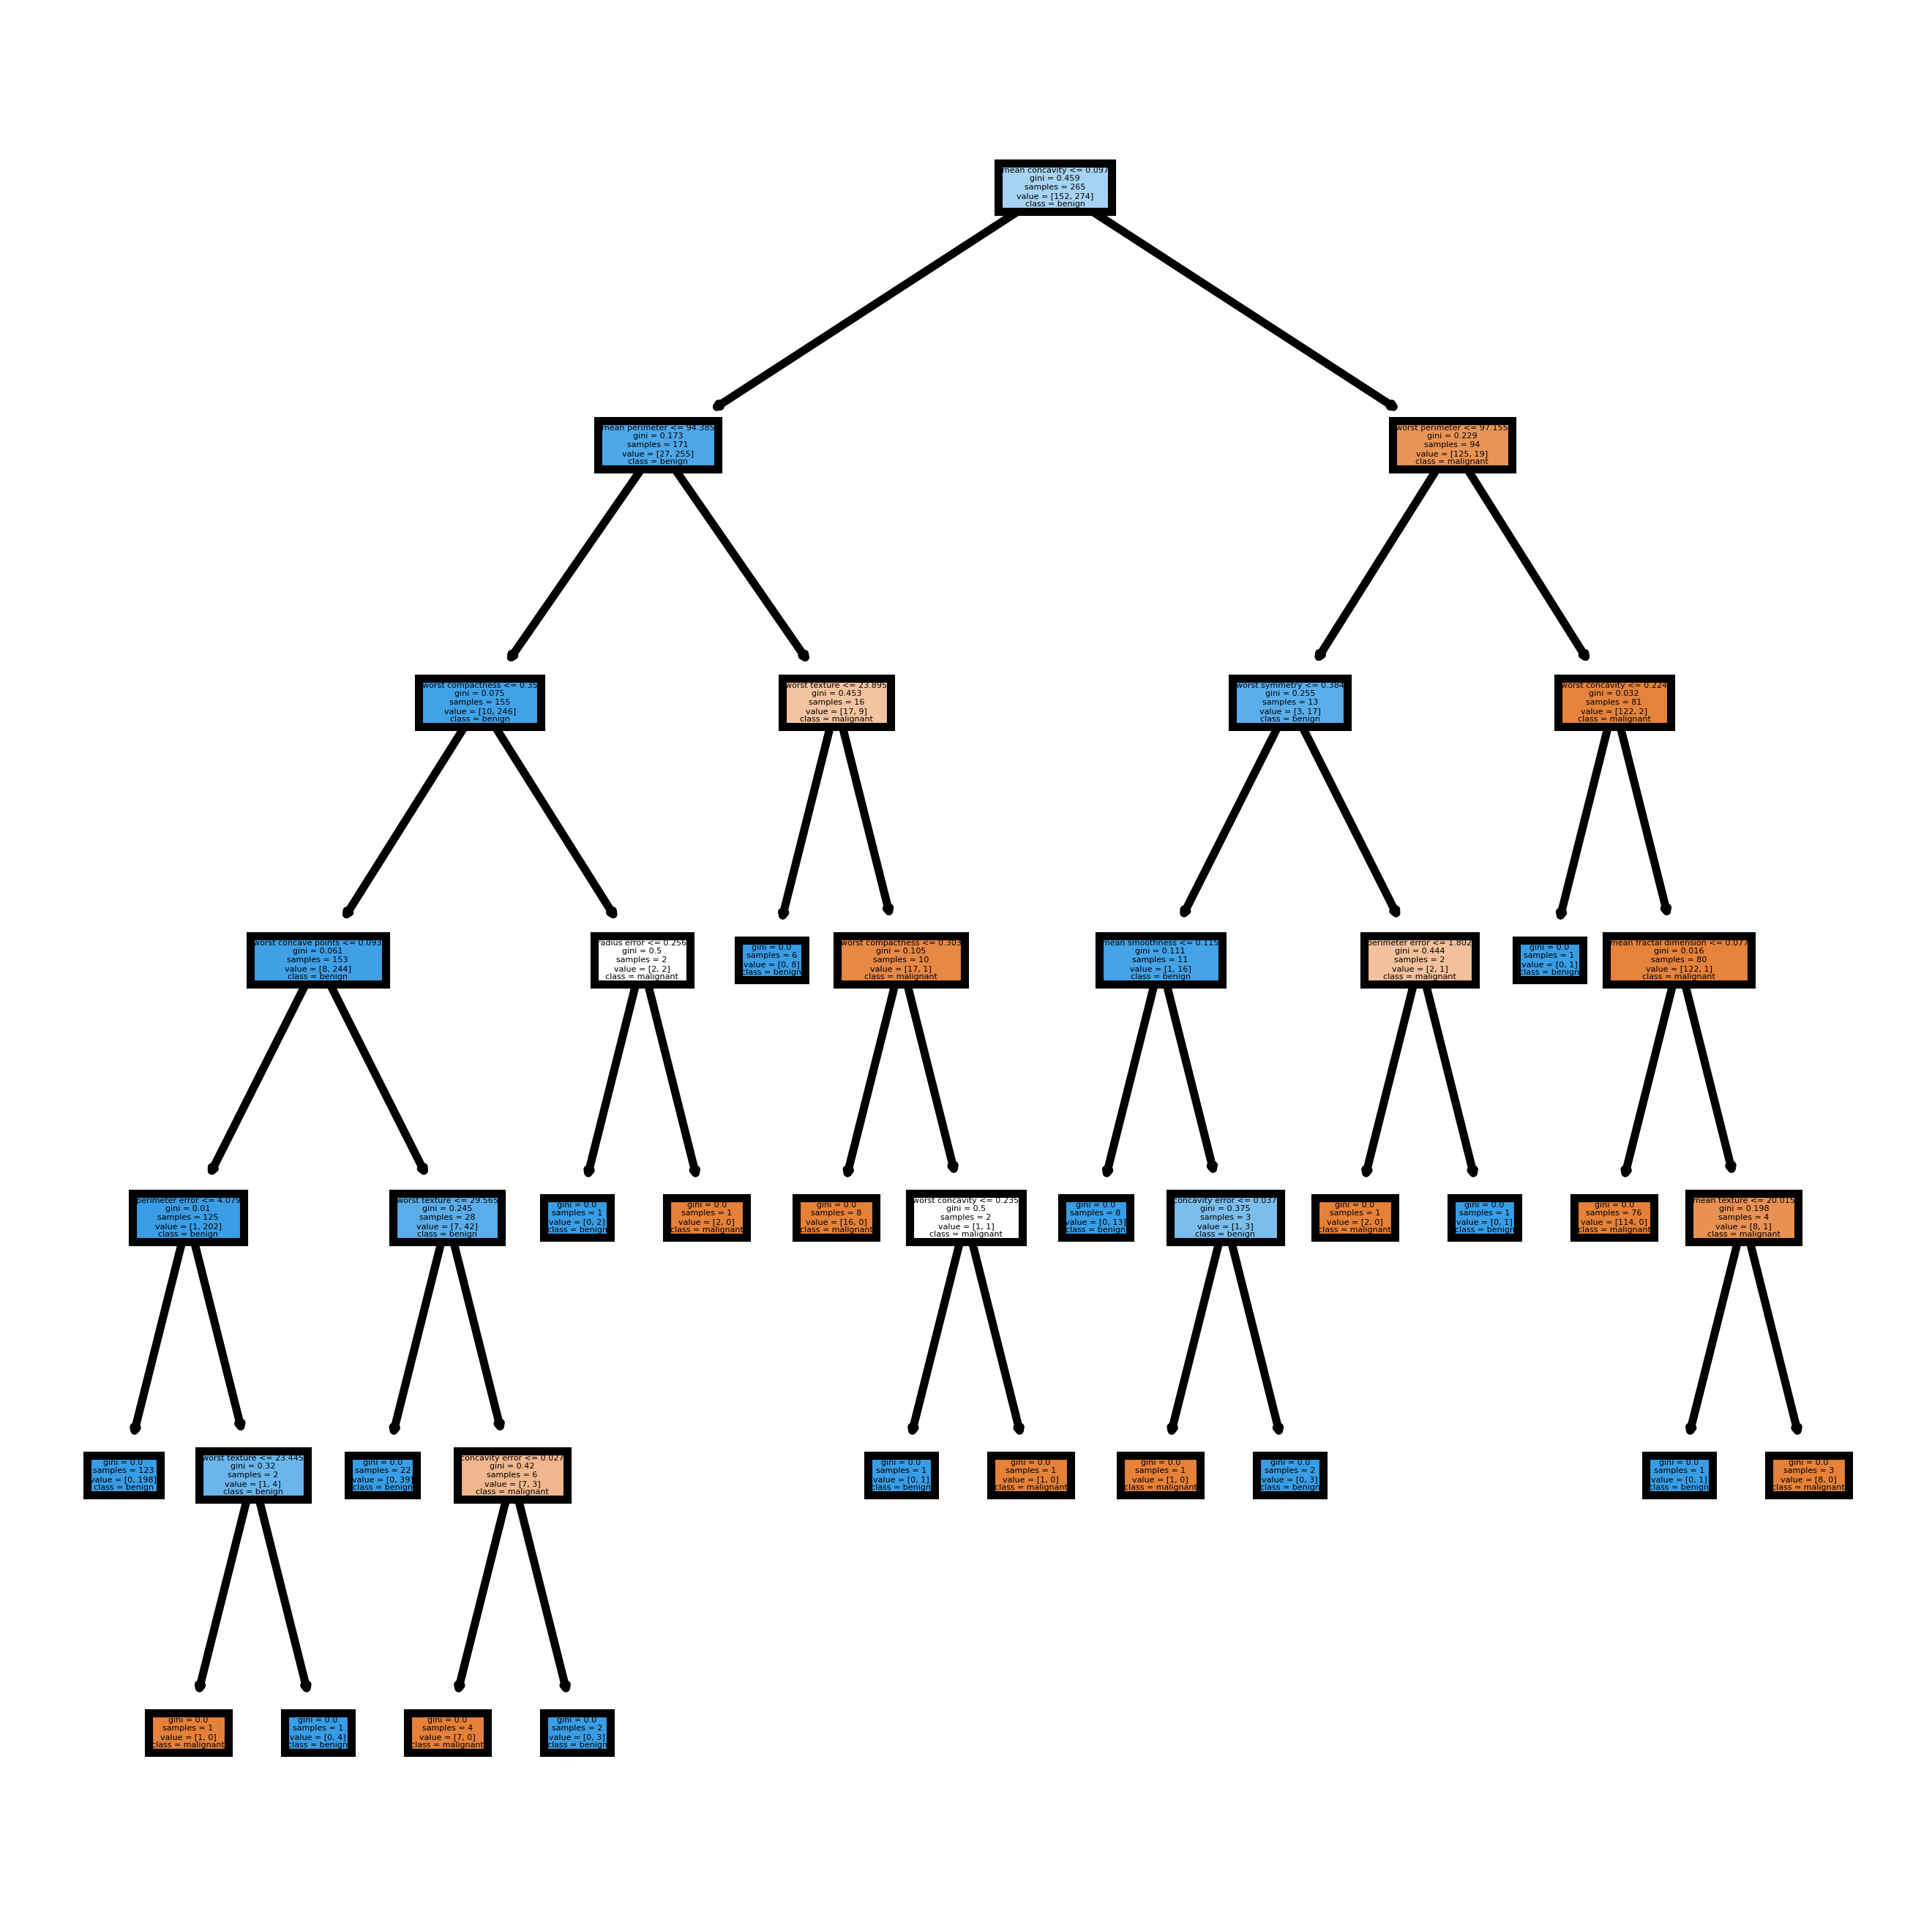

In [15]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [16]:
# This may not the best way to view each estimator as it is small
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn,
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [20]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree